In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
from imblearn.over_sampling import SMOTE
from torch.autograd.functional import hessian
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    cohen_kappa_score,
    confusion_matrix,
)
import umap.umap_ as umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import warnings

In [5]:
warnings.filterwarnings("ignore")

In [6]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
dataset_df = pd.read_csv("sp_train_responsiveness.csv")
dataset_df

,d_spkt_welch_density__coeff_8,"d_fft_coefficient__attr_""real""__coeff_6","d_fft_coefficient__attr_""real""__coeff_15","d_fft_coefficient__attr_""real""__coeff_18","d_fft_coefficient__attr_""real""__coeff_25","d_fft_coefficient__attr_""real""__coeff_32","d_fft_coefficient__attr_""real""__coeff_38","d_fft_coefficient__attr_""imag""__coeff_12","d_fft_coefficient__attr_""imag""__coeff_27","d_fft_coefficient__attr_""imag""__coeff_30","d_fft_coefficient__attr_""abs""__coeff_1","d_fft_coefficient__attr_""abs""__coeff_13","d_fft_coefficient__attr_""abs""__coeff_45",d_value_count__value_0,d_number_crossing_m__m_0,class
0,-0.464561,1.713729,2.294402,-0.090832,0.076006,0.688695,0.465826,1.016219,-0.609774,-0.240831,2.066137,0.160842,-0.104246,0.630848,-0.383951,1.0
1,-0.173443,2.273573,0.319179,-1.154617,1.547498,0.110913,1.037974,-1.020755,0.312202,0.215301,1.511787,-1.086690,0.819600,0.331989,-0.756816,1.0
2,1.273799,1.856653,-1.058200,-0.240451,0.245550,-0.672383,-2.451265,2.212185,-1.127752,-0.293503,2.066137,1.821971,1.640222,0.630848,-0.117620,1.0
3,2.259582,-1.163020,-1.958868,-1.107179,-0.210508,-0.155766,-0.141578,0.138081,-2.700286,-1.928375,2.066137,1.029637,2.318216,0.630848,-1.076414,1.0
4,2.259582,-0.614764,1.362632,0.814125,0.814727,1.452188,0.373495,-0.094436,0.642704,0.535789,0.263474,0.016455,-0.291620,0.331989,-0.383951,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,-0.459998,-0.490364,-0.882353,2.202894,-1.367011,-0.083519,-0.462709,-0.680405,0.317166,-1.340135,-0.387444,0.645102,2.143578,0.630848,0.628109,0.0
217,-0.444492,-0.967459,-0.803066,-0.700489,-0.111128,-0.075355,-0.570893,0.340835,-1.346027,1.355917,0.945672,-0.820375,-1.776154,-1.610589,-1.502545,0.0
218,-0.530635,1.168725,-1.317038,0.756954,2.366882,-1.589232,0.294676,0.017229,0.812180,-2.099895,-1.637120,-0.202333,-0.702089,-0.265727,1.427104,0.0
219,0.685906,-0.515285,-1.913814,0.184506,0.189682,0.703436,1.091319,-1.385016,0.458463,2.253475,0.149635,1.142801,-0.003354,0.630848,-0.064353,0.0


<IPython.core.display.Javascript object>

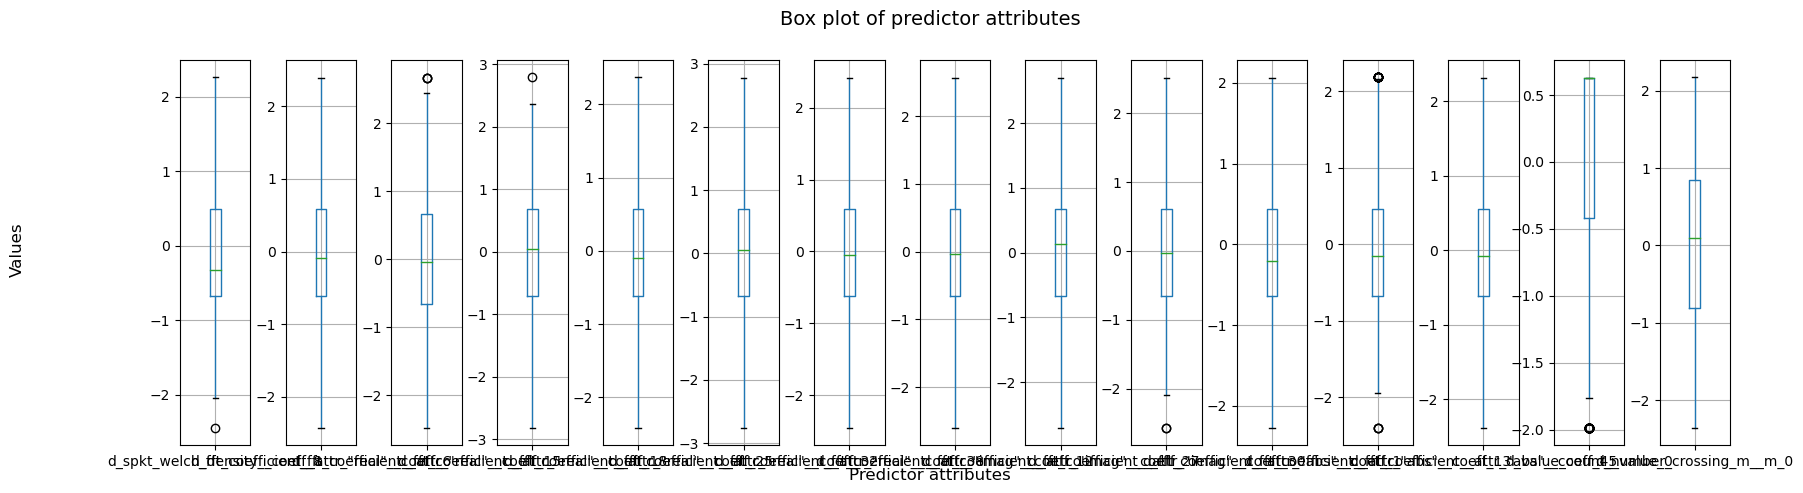

<IPython.core.display.Javascript object>

In [7]:
# Extract the predictor attributes (all columns except the "class" column)
predictors = dataset_df.columns[:-1]

# Create a grid of subplots with one row and as many columns as there are predictors
fig, axes = plt.subplots(nrows=1, ncols=len(predictors), figsize=(20, 5))

# Loop through each predictor attribute and plot a boxplot in a separate subplot
for i, predictor in enumerate(predictors):
    dataset_df.boxplot(column=predictor, ax=axes[i], showfliers=True)
    # axes[i].set_title(predictor)
    axes[i].set_title("")
    axes[i].set_xlabel("")

# Set the plot title and labels
fig.suptitle("Box plot of predictor attributes", fontsize=14)
fig.text(0.5, 0.04, "Predictor attributes", ha="center", fontsize=12)
fig.text(0.04, 0.5, "Values", va="center", rotation="vertical", fontsize=12)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()

In [8]:
predictor_columns = [col for col in dataset_df.columns if col != "class"]
column_index_map = {}
for i, col_name in enumerate(predictor_columns):
    column_index_map[i] = col_name

<IPython.core.display.Javascript object>

In [9]:
# Split dataset into training and test sets
train_df, test_df = train_test_split(dataset_df, test_size=0.2, random_state=42)

# Separate target variable from features
train_y = train_df["class"]
train_X = train_df.drop("class", axis=1)
y_test = test_df["class"]
X_test = test_df.drop("class", axis=1)

# Resample the training set using RandomOverSampler to address class imbalance
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(train_X, train_y)

<IPython.core.display.Javascript object>

In [10]:
# Calculating the covariance matrix
covariance_matrix = train_X.cov()

<IPython.core.display.Javascript object>

In [11]:
covariance_matrix

,d_spkt_welch_density__coeff_8,"d_fft_coefficient__attr_""real""__coeff_6","d_fft_coefficient__attr_""real""__coeff_15","d_fft_coefficient__attr_""real""__coeff_18","d_fft_coefficient__attr_""real""__coeff_25","d_fft_coefficient__attr_""real""__coeff_32","d_fft_coefficient__attr_""real""__coeff_38","d_fft_coefficient__attr_""imag""__coeff_12","d_fft_coefficient__attr_""imag""__coeff_27","d_fft_coefficient__attr_""imag""__coeff_30","d_fft_coefficient__attr_""abs""__coeff_1","d_fft_coefficient__attr_""abs""__coeff_13","d_fft_coefficient__attr_""abs""__coeff_45",d_value_count__value_0,d_number_crossing_m__m_0
d_spkt_welch_density__coeff_8,0.972981,-0.028577,0.044285,-0.044623,-0.048592,-0.149674,-0.061045,-0.034246,-0.015704,-0.128724,0.398078,0.327967,0.161055,0.228706,-0.098354
"d_fft_coefficient__attr_""real""__coeff_6",-0.028577,0.962559,0.001931,0.084551,0.159659,-0.006496,-0.009260,-0.081246,0.110041,-0.023350,-0.028066,-0.048691,-0.141961,-0.019080,-0.035282
"d_fft_coefficient__attr_""real""__coeff_15",0.044285,0.001931,0.917443,-0.032674,-0.185995,0.000237,0.023180,0.028149,-0.008374,0.075066,0.026748,0.075073,-0.089814,-0.072700,0.001263
"d_fft_coefficient__attr_""real""__coeff_18",-0.044623,0.084551,-0.032674,0.969714,0.040485,-0.023072,0.012952,0.021888,0.018365,-0.033148,-0.085016,0.119674,0.055862,-0.031855,0.017399
"d_fft_coefficient__attr_""real""__coeff_25",-0.048592,0.159659,-0.185995,0.040485,1.064373,0.047361,-0.119991,-0.075403,0.075730,0.058712,-0.013091,-0.090482,-0.008815,0.071714,0.100557
"d_fft_coefficient__attr_""real""__coeff_32",-0.149674,-0.006496,0.000237,-0.023072,0.047361,0.943968,-0.052823,-0.090156,0.084855,0.017451,-0.052345,-0.084882,0.026399,0.013250,0.008394
"d_fft_coefficient__attr_""real""__coeff_38",-0.061045,-0.009260,0.023180,0.012952,-0.119991,-0.052823,0.975222,-0.078108,0.162825,0.059088,0.011539,0.008258,-0.018639,-0.039135,-0.084794
"d_fft_coefficient__attr_""imag""__coeff_12",-0.034246,-0.081246,0.028149,0.021888,-0.075403,-0.090156,-0.078108,0.953117,-0.089805,-0.001062,-0.087026,0.121656,0.057233,-0.068841,0.076374
"d_fft_coefficient__attr_""imag""__coeff_27",-0.015704,0.110041,-0.008374,0.018365,0.075730,0.084855,0.162825,-0.089805,0.953631,-0.139519,-0.074893,0.010682,-0.077106,-0.002312,-0.063326
"d_fft_coefficient__attr_""imag""__coeff_30",-0.128724,-0.023350,0.075066,-0.033148,0.058712,0.017451,0.059088,-0.001062,-0.139519,0.952943,-0.079650,-0.057309,-0.065690,-0.084261,-0.027979


<IPython.core.display.Javascript object>

In [12]:
C_eigenvalues, C_eigenvectors = np.linalg.eig(covariance_matrix)

<IPython.core.display.Javascript object>

In [13]:
sorted_indices = np.argsort(C_eigenvalues)[::-1]
C_eigenvalues_sorted = C_eigenvalues[sorted_indices]
C_eigenvectors_sorted = C_eigenvectors[:, sorted_indices]

<IPython.core.display.Javascript object>

In [14]:
# Define the neural network model
class MyModel(nn.Module):
    def __init__(self, input_dim):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 1)
        self.act = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.act(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x


# Create a custom dataset class
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


# Set the random seed
torch.manual_seed(19)

# Create data loaders for training and test sets
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Instantiate the model and the optimizer
model = MyModel(X_train.shape[1])
optimizer = optim.Adam(model.parameters())

# Train the model
num_epochs = 1000
es = None  
criterion = nn.BCELoss()
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()

# Evaluate the model
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_pred_proba = model(X_test_tensor).detach().numpy()
y_pred = (y_pred_proba >= 0.5).astype(int)
auc_roc = roc_auc_score(y_test, y_pred_proba)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
gmean = geometric_mean_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Test set targets:", y_test.values)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("Precision:", precision)
print("F1 score:", f1score)

# Print evaluation metrics
print("AUC ROC:", auc_roc)
print("Cohen Kappa Score:", cohen_kappa)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Geometric Mean Score:", gmean)

Test set targets: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Confusion Matrix:
[[38  1]
 [ 0  6]]
Precision: 0.8571428571428571
Recall: 1.0
Precision: 0.8571428571428571
F1 score: 0.923076923076923
AUC ROC: 0.9914529914529915
Cohen Kappa Score: 0.9101796407185628
Accuracy: 0.9777777777777777
Geometric Mean Score: 0.9870962335856491


<IPython.core.display.Javascript object>

In [15]:
# Set the model to evaluation mode
model.eval()

# Compute the average Hessian matrix
hessian_sum = None
for i in range(len(train_X)):
    x = torch.tensor(train_X.iloc[i].values, dtype=torch.float32)
    y = torch.tensor([train_y.iloc[i]], dtype=torch.float32)

    hessian_matrix = hessian(lambda inputs: criterion(model(inputs), y), x)

    if hessian_sum is None:
        hessian_sum = hessian_matrix
    else:
        hessian_sum += hessian_matrix

hessian_matrix_avg = hessian_sum / len(train_X)

print("Expected Hessian matrix:\n", hessian_matrix_avg)

Expected Hessian matrix:
 tensor([[ 7.2394e-06,  6.7650e-06,  2.3467e-06,  5.3820e-06,  3.3769e-06,
          2.2450e-06,  1.6124e-06, -4.7183e-06, -6.5816e-06, -2.8102e-06,
          1.0099e-05, -1.4231e-06, -5.4212e-06,  1.0528e-06, -1.0348e-05],
        [ 6.7650e-06,  7.2238e-06,  2.3858e-06,  6.1291e-06,  3.6458e-06,
          1.9086e-06,  1.7643e-06, -5.4583e-06, -7.0351e-06, -2.7990e-06,
          1.0248e-05, -1.9427e-06, -5.7750e-06,  7.6024e-07, -1.0766e-05],
        [ 2.3467e-06,  2.3858e-06,  1.1595e-06,  2.0811e-06,  9.0618e-07,
          7.4964e-07,  7.5338e-07, -1.9762e-06, -2.4361e-06, -1.1367e-06,
          3.7499e-06, -7.6649e-07, -2.4724e-06,  1.1514e-07, -4.3050e-06],
        [ 5.3820e-06,  6.1291e-06,  2.0811e-06,  5.7622e-06,  3.3492e-06,
          9.3891e-07,  1.8538e-06, -5.0152e-06, -6.0720e-06, -2.5344e-06,
          8.0664e-06, -1.8657e-06, -4.8476e-06,  5.6580e-07, -8.8629e-06],
        [ 3.3769e-06,  3.6458e-06,  9.0618e-07,  3.3492e-06,  2.5516e-06,
        

<IPython.core.display.Javascript object>

In [16]:
H = hessian_matrix_avg.numpy()
H_eigenvalues, H_eigenvectors = np.linalg.eig(H)

<IPython.core.display.Javascript object>

In [17]:
sorted_indices = np.argsort(H_eigenvalues)[::-1]
H_eigenvalues_sorted = H_eigenvalues[sorted_indices]
H_eigenvectors_sorted = H_eigenvectors[:, sorted_indices]

<IPython.core.display.Javascript object>

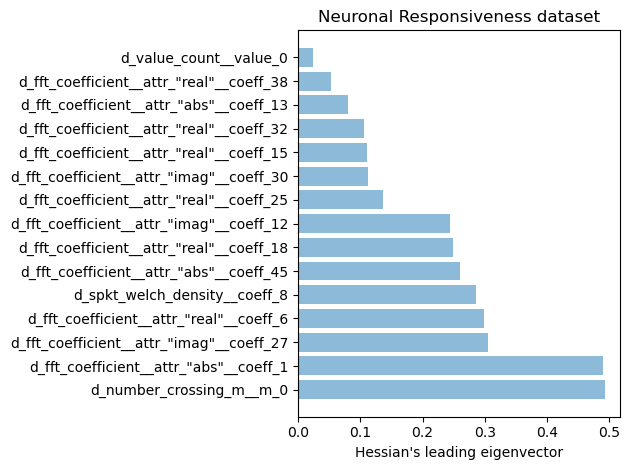

<IPython.core.display.Javascript object>

In [18]:
H_first_eigenvector = abs(H_eigenvectors_sorted[:, 0])

# Define parameter names (if you have specific names for your parameters, replace them here)
param_names = [column_index_map[i] for i in range(15)]


# Sort the parameters by their absolute contributions
sorted_indices = np.argsort(np.abs(H_first_eigenvector))[::-1]
sorted_param_names = [param_names[i] for i in sorted_indices]
sorted_contributions = H_first_eigenvector[sorted_indices]

# Create a horizontal bar plot
y_pos = np.arange(len(sorted_param_names))
plt.barh(y_pos, sorted_contributions, align="center", alpha=0.5)
plt.yticks(y_pos, sorted_param_names)
plt.xlabel("Hessian's leading eigenvector")
# plt.title('Sorted Contributions of Parameters to the Third Eigenvector')
plt.title("Neuronal Responsiveness dataset")
# Display the plot
plt.tight_layout()
plt.show()

Projection (0, 0): d2=3.358, var0=0.607, var1=0.653
Projection (0, 1): d2=0.315, var0=0.607, var1=0.653
Projection (0, 2): d2=0.003, var0=0.607, var1=0.653
Projection (0, 3): d2=0.109, var0=0.607, var1=0.653
Projection (0, 4): d2=0.041, var0=0.607, var1=0.653
Projection (1, 0): d2=3.358, var0=1.034, var1=0.564
Projection (1, 1): d2=0.315, var0=1.034, var1=0.564
Projection (1, 2): d2=0.003, var0=1.034, var1=0.564
Projection (1, 3): d2=0.109, var0=1.034, var1=0.564
Projection (1, 4): d2=0.041, var0=1.034, var1=0.564
Projection (2, 0): d2=3.358, var0=0.952, var1=1.104
Projection (2, 1): d2=0.315, var0=0.952, var1=1.104
Projection (2, 2): d2=0.003, var0=0.952, var1=1.104
Projection (2, 3): d2=0.109, var0=0.952, var1=1.104
Projection (2, 4): d2=0.041, var0=0.952, var1=1.104
Projection (3, 0): d2=3.358, var0=0.771, var1=1.344
Projection (3, 1): d2=0.315, var0=0.771, var1=1.344
Projection (3, 2): d2=0.003, var0=0.771, var1=1.344
Projection (3, 3): d2=0.109, var0=0.771, var1=1.344
Projection (

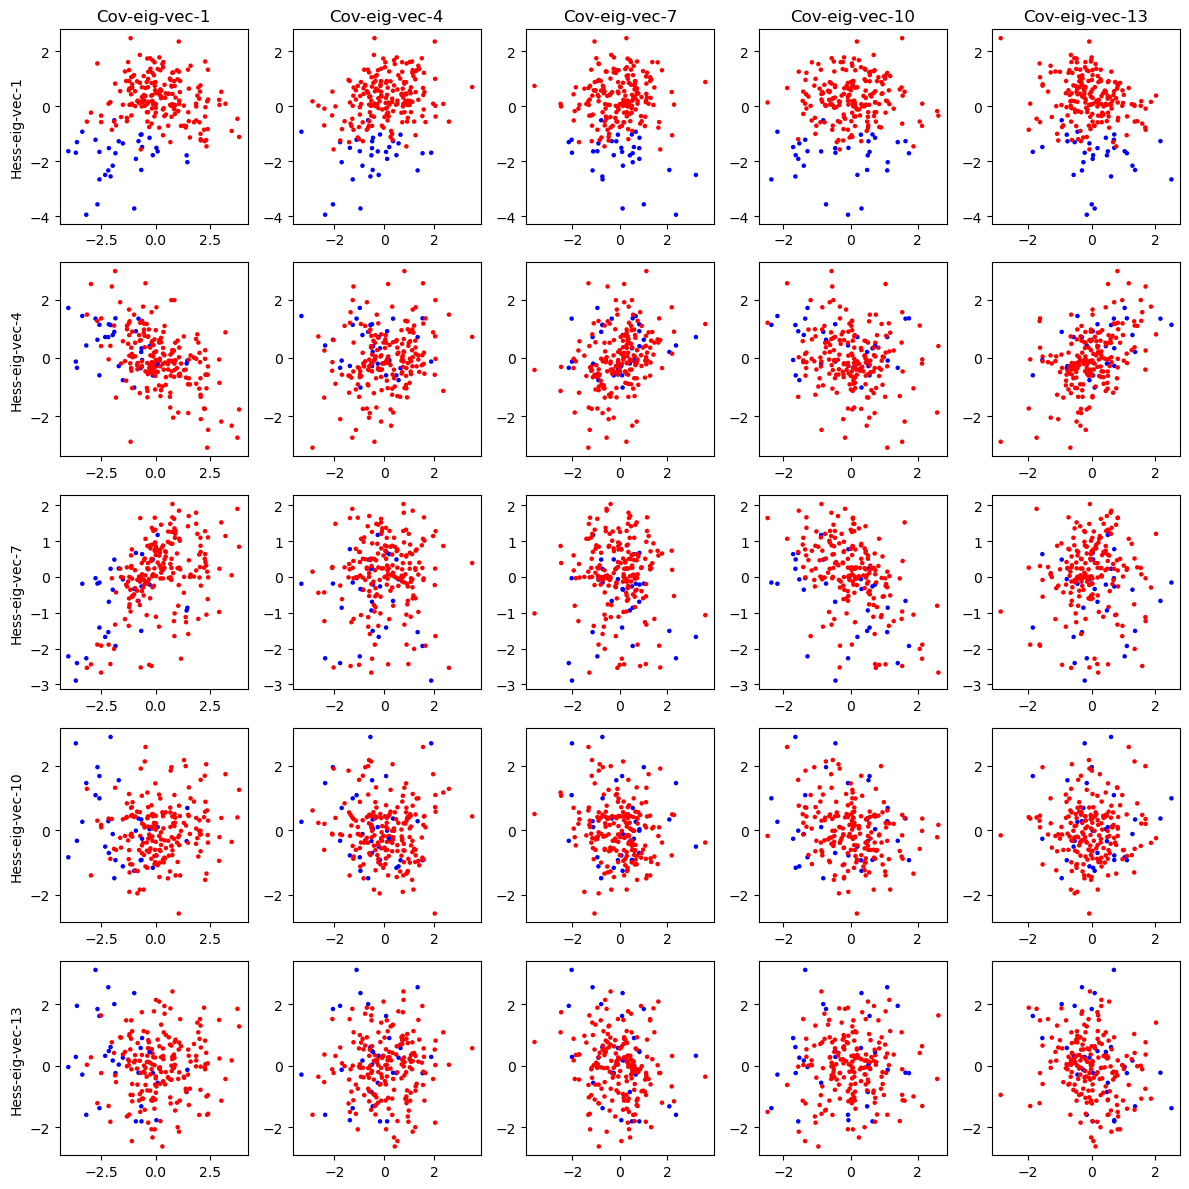

<IPython.core.display.Javascript object>

In [19]:
# Compute 15-dimensional projections using eigenvectors_sorted
H_proj = np.dot(dataset_df.drop("class", axis=1), H_eigenvectors_sorted[:, :15])

# Compute 15-dimensional projections using eigenvectors_sorted
C_proj = np.dot(dataset_df.drop("class", axis=1), C_eigenvectors_sorted[:, :15])

# Define colors based on class values in train_y
colors = ["red" if y == 0 else "blue" for y in dataset_df["class"]]

# Select eigenvectors for projection
H_proj_selected = [
    H_proj[:, 0],
    H_proj[:, 3],
    H_proj[:, 6],
    H_proj[:, 9],
    H_proj[:, 12],
]
C_proj_selected = [
    C_proj[:, 0],
    C_proj[:, 3],
    C_proj[:, 6],
    C_proj[:, 9],
    C_proj[:, 12],
]

# Compute and visualize all 16 projections
fig, axs = plt.subplots(5, 5, figsize=(12, 12))

results = []
for i in range(5):
    for j in range(5):
        # Compute the 2-dimensional projection using the current eigenvectors
        X_proj = np.stack((H_proj_selected[i], C_proj_selected[j]), axis=1)

        # Compute the mean of each class
        mean0 = np.mean(C_proj_selected[j][dataset_df["class"] == 0], axis=0)
        mean1 = np.mean(C_proj_selected[j][dataset_df["class"] == 1], axis=0)

        m0 = np.mean(H_proj_selected[i][dataset_df["class"] == 0], axis=0)
        m1 = np.mean(H_proj_selected[i][dataset_df["class"] == 1], axis=0)

        # Compute the squared distance of inter-class means
        d2 = np.sum(np.square(mean0 - mean1))

        # Compute the variance of class 0
        var0 = np.sum(np.square(H_proj_selected[i][dataset_df["class"] == 0] - m0)) / (
            H_proj_selected[i][dataset_df["class"] == 0].shape[0] - 1
        )

        # Compute the variance of class 1
        var1 = np.sum(np.square(H_proj_selected[i][dataset_df["class"] == 1] - m1)) / (
            H_proj_selected[i][dataset_df["class"] == 1].shape[0] - 1
        )

        # Plot the projection on the corresponding subplot
        axs[i, j].scatter(C_proj_selected[j], H_proj_selected[i], c=colors, s=5)
        # axs[i, j].set_xticks([])
        # axs[i, j].set_yticks([])
        # axs[i, j].set_xlabel(f"H{i*3 + 1} C{j*3 + 1}")
        # axs[i, j].set_ylabel(f"Dimension {j*3+1}")
        # Add labels for each row
        axs[i, 0].set_ylabel(f"Hess-eig-vec-{3*i+1}")

        # Add labels for each column
        axs[0, j].set_title(f"Cov-eig-vec-{3*j+1}")

        # Store the computed values
        results.append({"projection": (i, j), "d2": d2, "var0": var0, "var1": var1})

# Display the computed values
for result in results:
    print(
        f"Projection {result['projection']}: d2={result['d2']:.3f}, var0={result['var0']:.3f}, var1={result['var1']:.3f}"
    )

plt.tight_layout()
plt.show()

Projection (0, 0): d2=1.817, var0=0.523, var1=0.562
Projection (0, 1): d2=0.269, var0=0.523, var1=0.562
Projection (0, 2): d2=0.003, var0=0.523, var1=0.562
Projection (0, 3): d2=0.111, var0=0.523, var1=0.562
Projection (0, 4): d2=0.055, var0=0.523, var1=0.562
Projection (1, 0): d2=1.817, var0=1.051, var1=0.573
Projection (1, 1): d2=0.269, var0=1.051, var1=0.573
Projection (1, 2): d2=0.003, var0=1.051, var1=0.573
Projection (1, 3): d2=0.111, var0=1.051, var1=0.573
Projection (1, 4): d2=0.055, var0=1.051, var1=0.573
Projection (2, 0): d2=1.817, var0=0.933, var1=1.082
Projection (2, 1): d2=0.269, var0=0.933, var1=1.082
Projection (2, 2): d2=0.003, var0=0.933, var1=1.082
Projection (2, 3): d2=0.111, var0=0.933, var1=1.082
Projection (2, 4): d2=0.055, var0=0.933, var1=1.082
Projection (3, 0): d2=1.817, var0=0.912, var1=1.590
Projection (3, 1): d2=0.269, var0=0.912, var1=1.590
Projection (3, 2): d2=0.003, var0=0.912, var1=1.590
Projection (3, 3): d2=0.111, var0=0.912, var1=1.590
Projection (

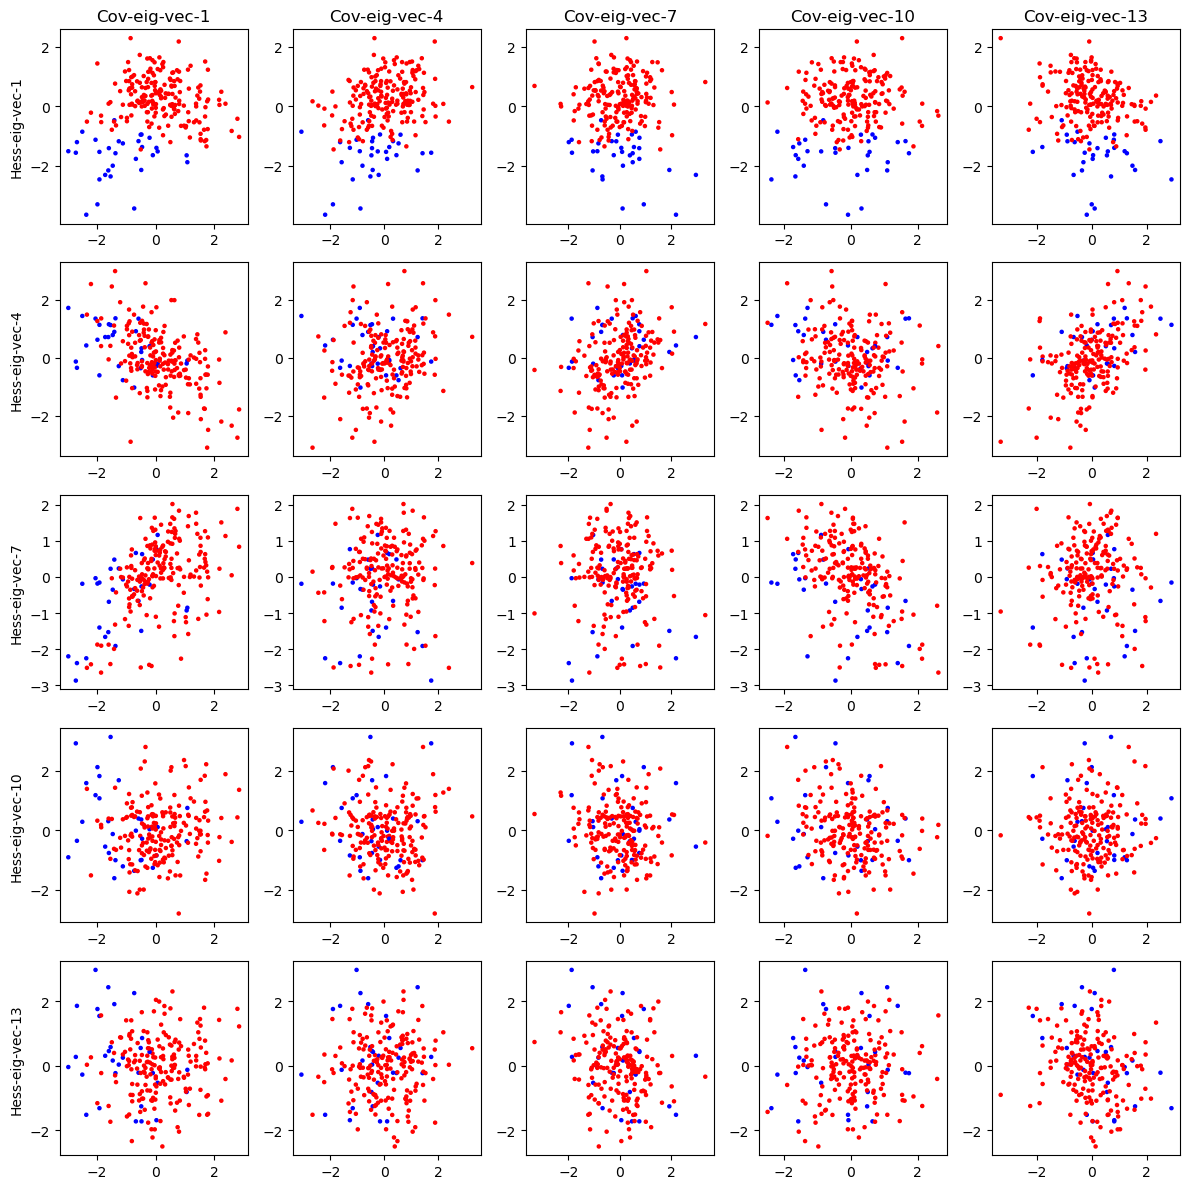

<IPython.core.display.Javascript object>

In [20]:
# Compute 15-dimensional projections using eigenvectors_sorted
H_proj = np.dot(dataset_df.drop("class", axis=1), H_eigenvectors_sorted[:, :30])

# Compute 15-dimensional projections using eigenvectors_sorted
C_proj = np.dot(dataset_df.drop("class", axis=1), C_eigenvectors_sorted[:, :30])

# Define colors based on class values in train_y
colors = ["red" if y == 0 else "blue" for y in dataset_df["class"]]

# Select eigenvectors for projection
H_proj_selected = [
    H_proj[:, 0] / np.std(H_proj[:, 0]),
    H_proj[:, 3] / np.std(H_proj[:, 3]),
    H_proj[:, 6] / np.std(H_proj[:, 6]),
    H_proj[:, 9] / np.std(H_proj[:, 9]),
    H_proj[:, 12] / np.std(H_proj[:, 12]),
]
C_proj_selected = [
    2
    * C_proj[:, 0]
    / (
        np.std(C_proj[:, 0][dataset_df["class"] == 0])
        + np.std(C_proj[:, 0][dataset_df["class"] == 1])
    ),
    2
    * C_proj[:, 3]
    / (
        np.std(C_proj[:, 3][dataset_df["class"] == 0])
        + np.std(C_proj[:, 3][dataset_df["class"] == 1])
    ),
    2
    * C_proj[:, 6]
    / (
        np.std(C_proj[:, 6][dataset_df["class"] == 0])
        + np.std(C_proj[:, 6][dataset_df["class"] == 1])
    ),
    2
    * C_proj[:, 9]
    / (
        np.std(C_proj[:, 9][dataset_df["class"] == 0])
        + np.std(C_proj[:, 9][dataset_df["class"] == 1])
    ),
    2
    * C_proj[:, 12]
    / (
        np.std(C_proj[:, 12][dataset_df["class"] == 0])
        + np.std(C_proj[:, 12][dataset_df["class"] == 1])
    ),
]

# Compute and visualize all 16 projections
fig, axs = plt.subplots(5, 5, figsize=(12, 12))

results = []
for i in range(5):
    for j in range(5):
        # Compute the 2-dimensional projection using the current eigenvectors
        X_proj = np.stack(
            (
                H_proj_selected[i] / np.std(H_proj_selected[i]),
                C_proj_selected[j] / np.std(C_proj_selected[j]),
            ),
            axis=1,
        )

        # Compute the mean of each class
        mean0 = np.mean(C_proj_selected[j][dataset_df["class"] == 0], axis=0)
        mean1 = np.mean(C_proj_selected[j][dataset_df["class"] == 1], axis=0)

        m0 = np.mean(H_proj_selected[i][dataset_df["class"] == 0], axis=0)
        m1 = np.mean(H_proj_selected[i][dataset_df["class"] == 1], axis=0)

        # Compute the squared distance of inter-class means
        d2 = np.sum(np.square(mean0 - mean1))

        # Compute the variance of class 0
        var0 = np.sum(np.square(H_proj_selected[i][dataset_df["class"] == 0] - m0)) / (
            H_proj_selected[i][dataset_df["class"] == 0].shape[0] - 1
        )
        # print(H_proj_selected[i][dataset_df["class"] == 0])

        # Compute the variance of class 1
        var1 = np.sum(np.square(H_proj_selected[i][dataset_df["class"] == 1] - m1)) / (
            H_proj_selected[i][dataset_df["class"] == 1].shape[0] - 1
        )
        # print(H_proj_selected[i][dataset_df["class"] == 1])

        # Plot the projection on the corresponding subplot
        axs[i, j].scatter(C_proj_selected[j], H_proj_selected[i], c=colors, s=5)
        # axs[i, j].set_xticks([])
        # axs[i, j].set_yticks([])
        # axs[i, j].set_xlabel(f"H{i*3 + 1} C{j*3 + 1}")
        # axs[i, j].set_ylabel(f"Dimension {j*3+1}")
        # Add labels for each row
        axs[i, 0].set_ylabel(f"Hess-eig-vec-{3*i+1}")

        # Add labels for each column
        axs[0, j].set_title(f"Cov-eig-vec-{3*j+1}")

        # Store the computed values
        results.append({"projection": (i, j), "d2": d2, "var0": var0, "var1": var1})

# Display the computed values
for result in results:
    print(
        f"Projection {result['projection']}: d2={result['d2']:.3f}, var0={result['var0']:.3f}, var1={result['var1']:.3f}"
    )

plt.tight_layout()
plt.show()

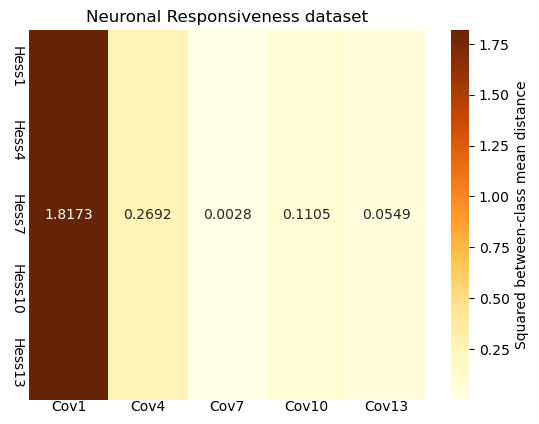

<IPython.core.display.Javascript object>

In [21]:
d2_matrix = np.array([result["d2"] for result in results]).reshape(5, 5)

# Create a heatmap of the d2 matrix using seaborn
annot = np.full_like(d2_matrix, "", dtype=np.object)
annot[2, :] = np.round(d2_matrix[2, :], decimals=4).astype(str)
ax = sns.heatmap(d2_matrix, annot=annot, fmt="", cmap="YlOrBr", cbar=True)

# ax = sns.heatmap(d2_matrix, annot=np.where(np.arange(d2_matrix.shape[0]) == 2, d2_matrix.round(4).astype(str), None), fmt='', cmap="YlOrBr", cbar=True, cbar_kws={"label": 'Squared between-class mean distance'})
ax.set_xticks([])
ax.set_yticks([])

# Add slope values to the right of each row and to the bottom of each column
for i in range(5):
    ax.text(i + 0.5, 5.1, f"Cov{i*3+1}", ha="center", va="center")
for j in range(5):
    ax.text(-0.15, j + 0.5, f"Hess{j*3+1}", ha="center", va="center", rotation=270)


# plt.title('Log squared distance of inter-class means')
# plt.xlabel('Covariance eigendirections ')
# plt.ylabel('Hessian eigendirections')

# Show the color bar
cbar = ax.collections[0].colorbar
cbar.set_label("Squared between-class mean distance")
plt.title("Neuronal Responsiveness dataset")
plt.show()

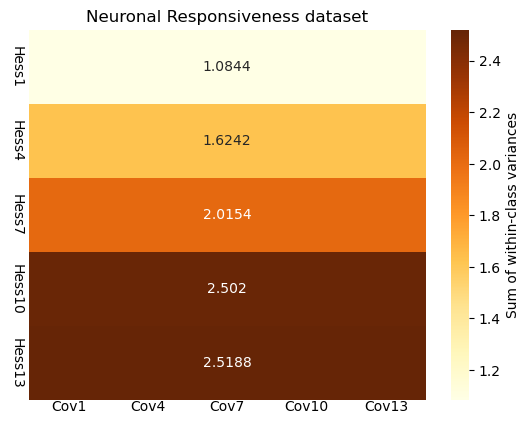

<IPython.core.display.Javascript object>

In [22]:
var0_matrix = np.array([result["var0"] for result in results]).reshape(5, 5)
var1_matrix = np.array([result["var1"] for result in results]).reshape(5, 5)

v_matrix = var0_matrix + var1_matrix


# Create a heatmap of the d2 matrix using seaborn
# ax = sns.heatmap(v_matrix, annot=True, fmt='.4f', cmap="YlOrBr", cbar=True)
# Create a heatmap of the d2 matrix using seaborn
ax = sns.heatmap(
    v_matrix,
    annot=np.where(
        np.arange(v_matrix.shape[0]) == 2, v_matrix.round(4).astype(str), ""
    ),
    fmt="",
    cmap="YlOrBr",
    cbar=True,
)
ax.set_xticks([])
ax.set_yticks([])


# Add slope values to the right of each row and to the bottom of each column
for i in range(5):
    ax.text(i + 0.5, 5.1, f"Cov{i*3+1}", ha="center", va="center")
for j in range(5):
    ax.text(-0.15, j + 0.5, f"Hess{j*3+1}", ha="center", va="center", rotation=270)


# plt.title('Log squared distance of inter-class means')
# plt.xlabel('Covariance eigendirections ')
# plt.ylabel('Hessian eigendirections')

# Show the color bar
cbar = ax.collections[0].colorbar
cbar.set_label("Sum of within-class variances")
plt.title("Neuronal Responsiveness dataset")

plt.show()

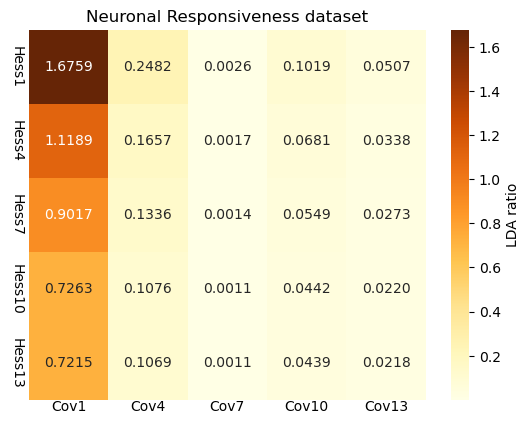

<IPython.core.display.Javascript object>

In [23]:
c_matrix = d2_matrix / (var0_matrix + var1_matrix)

# Create a heatmap of the d2 matrix using seaborn
ax = sns.heatmap(c_matrix, annot=True, fmt=".4f", cmap="YlOrBr", cbar=True)
ax.set_xticks([])
ax.set_yticks([])

# Add slope values to the right of each row and to the bottom of each column
for i in range(5):
    ax.text(i + 0.5, 5.1, f"Cov{i*3+1}", ha="center", va="center")
for j in range(5):
    ax.text(-0.15, j + 0.5, f"Hess{j*3+1}", ha="center", va="center", rotation=270)


# plt.title('Log squared distance of inter-class means')
# plt.xlabel('Covariance eigendirections ')
# plt.ylabel('Hessian eigendirections')

# Show the color bar
cbar = ax.collections[0].colorbar
cbar.set_label("LDA ratio")
plt.title("Neuronal Responsiveness dataset")

plt.show()

In [24]:
train_X

,d_spkt_welch_density__coeff_8,"d_fft_coefficient__attr_""real""__coeff_6","d_fft_coefficient__attr_""real""__coeff_15","d_fft_coefficient__attr_""real""__coeff_18","d_fft_coefficient__attr_""real""__coeff_25","d_fft_coefficient__attr_""real""__coeff_32","d_fft_coefficient__attr_""real""__coeff_38","d_fft_coefficient__attr_""imag""__coeff_12","d_fft_coefficient__attr_""imag""__coeff_27","d_fft_coefficient__attr_""imag""__coeff_30","d_fft_coefficient__attr_""abs""__coeff_1","d_fft_coefficient__attr_""abs""__coeff_13","d_fft_coefficient__attr_""abs""__coeff_45",d_value_count__value_0,d_number_crossing_m__m_0
218,-0.530635,1.168725,-1.317038,0.756954,2.366882,-1.589232,0.294676,0.017229,0.812180,-2.099895,-1.637120,-0.202333,-0.702089,-0.265727,1.427104
113,-0.398299,1.572492,0.342234,0.711454,0.361140,0.303516,-0.181056,-0.167044,0.120150,0.083193,-1.727756,-0.270937,-0.602572,0.630848,-1.129680
140,-0.518201,-2.420635,1.322607,0.705870,0.043008,0.869077,0.760692,-0.385323,-0.179202,-0.506318,0.726986,-2.397173,-1.617562,-1.984161,-1.502545
122,-1.387711,0.002871,-0.226238,0.686913,0.575038,-0.476599,-0.707713,0.227746,-0.344552,-0.207397,-1.985920,-0.592526,-0.399778,0.630848,0.681375
162,-0.084676,-0.325535,0.796556,0.585195,-0.392333,0.201700,2.420365,0.903847,0.652356,-0.000798,0.221458,0.573104,-0.025918,0.630848,0.574843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.369574,0.845805,-0.036507,0.439311,-0.657150,0.356009,-0.090061,0.806526,0.679956,-0.878759,-0.851668,-0.320189,-0.384208,-1.984161,-2.088474
14,0.015007,-0.484737,1.273839,0.186494,0.364649,0.632460,-1.564266,-0.250418,-0.809551,-0.642465,0.035379,0.675011,-2.007451,-1.984161,-2.301540
92,-1.003513,0.293380,0.018040,-1.138683,-0.820536,-0.601276,-0.231568,0.445668,0.227734,1.525954,-0.545690,-1.319042,-1.240563,-0.415156,-0.224152
179,0.673831,0.022739,-0.406855,0.787401,0.287677,-0.872132,0.604136,0.290913,0.362062,0.139334,-0.457328,-1.226109,-0.422471,0.630848,1.107506


<IPython.core.display.Javascript object>

In [25]:
X_test

,d_spkt_welch_density__coeff_8,"d_fft_coefficient__attr_""real""__coeff_6","d_fft_coefficient__attr_""real""__coeff_15","d_fft_coefficient__attr_""real""__coeff_18","d_fft_coefficient__attr_""real""__coeff_25","d_fft_coefficient__attr_""real""__coeff_32","d_fft_coefficient__attr_""real""__coeff_38","d_fft_coefficient__attr_""imag""__coeff_12","d_fft_coefficient__attr_""imag""__coeff_27","d_fft_coefficient__attr_""imag""__coeff_30","d_fft_coefficient__attr_""abs""__coeff_1","d_fft_coefficient__attr_""abs""__coeff_13","d_fft_coefficient__attr_""abs""__coeff_45",d_value_count__value_0,d_number_crossing_m__m_0
132,1.061975,-0.723182,-1.312856,-0.337866,-0.843242,0.547789,-0.728720,2.569445,-0.355712,-0.475456,-0.517787,-0.636801,-1.028003,-0.714014,-1.289479
148,-0.533918,0.645140,-0.003851,0.006758,0.496931,-1.521911,0.309207,0.631917,-0.298247,-0.507208,-1.102294,-0.409121,-1.013110,-1.984161,-2.354806
93,0.242561,-0.153465,0.987078,0.854256,2.366882,0.542659,-1.632084,0.436479,0.262766,0.398157,-0.227938,-0.680908,0.372169,0.630848,1.320571
180,-0.637559,-0.927513,-1.478469,0.000004,-0.372964,0.093167,0.245518,1.553647,1.078879,-0.318446,-0.346456,-0.694930,0.269882,0.630848,0.574843
15,2.168795,2.395020,0.704582,2.784192,-1.026711,-0.601310,1.707508,2.074156,-1.044481,0.357241,2.066137,-0.474033,2.318216,0.630848,-0.863349
115,-0.900529,0.741883,-0.137914,-1.157669,-0.502327,0.918443,-1.104697,0.224400,0.326002,1.018018,-0.319609,2.013508,0.350957,-1.984161,-0.703550
172,-0.126748,0.904911,-0.081334,1.212770,1.537116,0.707035,0.327146,-0.116399,-0.844305,1.005773,0.382328,-0.267145,0.464956,-1.162301,-0.490484
209,-0.204992,-0.212240,-0.865243,-0.610238,2.114333,-1.541446,-0.467000,-0.420662,0.855549,-0.173807,-0.651473,-0.615009,2.318216,0.630848,1.214039
75,-0.834825,-0.396364,-1.405369,-1.278951,1.105598,1.669274,1.755993,-0.323891,-1.637004,-0.292464,-0.531543,0.092716,-0.591103,-1.984161,-0.969881
142,-1.062507,0.070620,0.269934,-0.095573,-0.411732,-0.367520,-0.280746,-2.012415,-0.208126,-0.585669,-1.168344,-2.397173,-1.340964,-1.984161,-1.502545


<IPython.core.display.Javascript object>

## Proposed method

In [26]:
# Compute 15-dimensional projections using eigenvectors_sorted
H_train_proj = np.dot(train_X, H_eigenvectors_sorted[:, :15])

# Compute 15-dimensional projections using eigenvectors_sorted
C_train_proj = np.dot(train_X, C_eigenvectors_sorted[:, :15])

<IPython.core.display.Javascript object>

In [27]:
# Compute 15-dimensional projections using eigenvectors_sorted
H_test_proj = np.dot(X_test, H_eigenvectors_sorted[:, :15])

# Compute 15-dimensional projections using eigenvectors_sorted
C_test_proj = np.dot(X_test, C_eigenvectors_sorted[:, :15])

<IPython.core.display.Javascript object>

In [28]:

# Separate features and target variable
X_train_proj = np.stack((H_train_proj[:,0], C_train_proj[:,0]), axis=1)

X_test_proj = np.stack((H_test_proj[:,0], C_test_proj[:,0]), axis=1)


# Initialize the LinearSVC classifier
classifier = LinearSVC(random_state=1)

# Train the classifier on the training set
classifier.fit(X_train_proj, train_y)

# Make predictions on the training and test sets
y_test_pred = classifier.predict(X_test_proj)


<IPython.core.display.Javascript object>

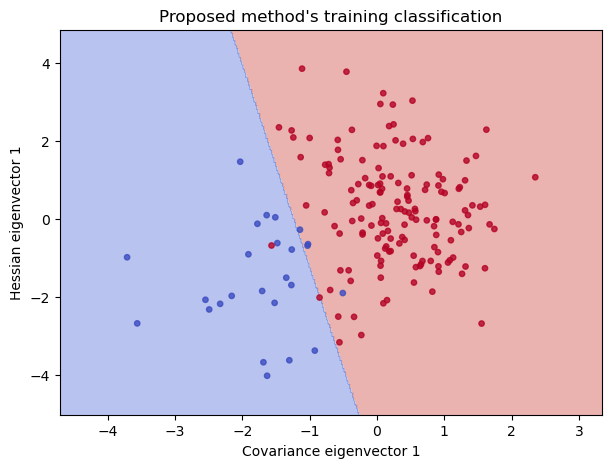

<IPython.core.display.Javascript object>

In [29]:
X_train_proj = pd.DataFrame(X_train_proj)

# Plot the training and test sets along with the separating hyperplane
x_min, x_max = X_train_proj.iloc[:, 0].min() - 1, X_train_proj.iloc[:, 0].max() + 1
y_min, y_max = X_train_proj.iloc[:, 1].min() - 1, X_train_proj.iloc[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.figure(figsize=(7, 5))

plt.contourf(X, Y, Z, alpha=0.4, cmap="coolwarm_r")
plt.scatter(
    X_train_proj.iloc[:, 0],
    X_train_proj.iloc[:, 1],
    c=train_y,
    alpha=0.8,
    cmap="coolwarm_r",
    s=15,
)
plt.ylabel("Hessian eigenvector 1")
plt.xlabel("Covariance eigenvector 1")
plt.title("Proposed method's training classification")
plt.show()

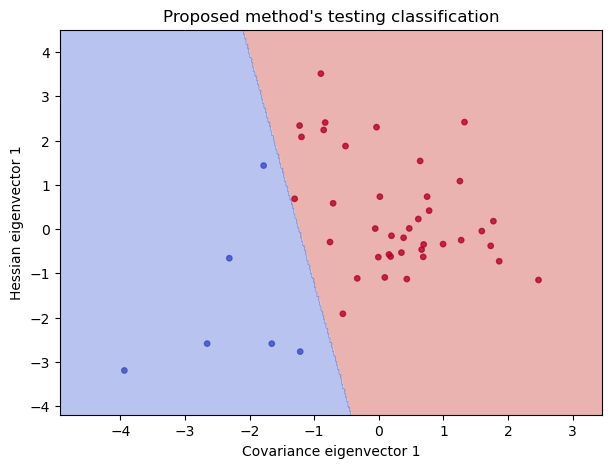

<IPython.core.display.Javascript object>

In [30]:
X_test_proj = pd.DataFrame(X_test_proj)

# Plot the training and test sets along with the separating hyperplane
x_min, x_max = X_test_proj.iloc[:, 0].min() - 1, X_test_proj.iloc[:, 0].max() + 1
y_min, y_max = X_test_proj.iloc[:, 1].min() - 1, X_test_proj.iloc[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.figure(figsize=(7, 5))

plt.contourf(X, Y, Z, alpha=0.4, cmap="coolwarm_r")
plt.scatter(
    X_test_proj.iloc[:, 0],
    X_test_proj.iloc[:, 1],
    c=y_test,
    alpha=0.8,
    cmap="coolwarm_r",
    s=15,
)
plt.ylabel("Hessian eigenvector 1")
plt.xlabel("Covariance eigenvector 1")
plt.title("Proposed method's testing classification")
plt.show()

In [31]:
# Calculate evaluation metrics for test sets

test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)

# Print evaluation metrics for test sets

print("\nTest set metrics:")
print("Confusion Matrix:")
print(confusion_matrix(y_test.values, y_test_pred))
print("Accuracy:", test_acc)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 score:", test_f1)
print("ROC AUC score:", test_roc_auc)
print("Cohen's kappa score:", test_kappa)


Test set metrics:
Confusion Matrix:
[[39  0]
 [ 0  6]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
ROC AUC score: 1.0
Cohen's kappa score: 1.0


<IPython.core.display.Javascript object>

## Both hessian

In [32]:

# Separate features and target variable
X_train_proj = np.stack((H_train_proj[:,0], H_train_proj[:,1]), axis=1)

X_test_proj = np.stack((H_test_proj[:,0], H_test_proj[:,1]), axis=1)


# Initialize the LinearSVC classifier
classifier = LinearSVC(random_state=1)

# Train the classifier on the training set
classifier.fit(X_train_proj, train_y)

# Make predictions on the training and test sets
y_test_pred = classifier.predict(X_test_proj)


<IPython.core.display.Javascript object>

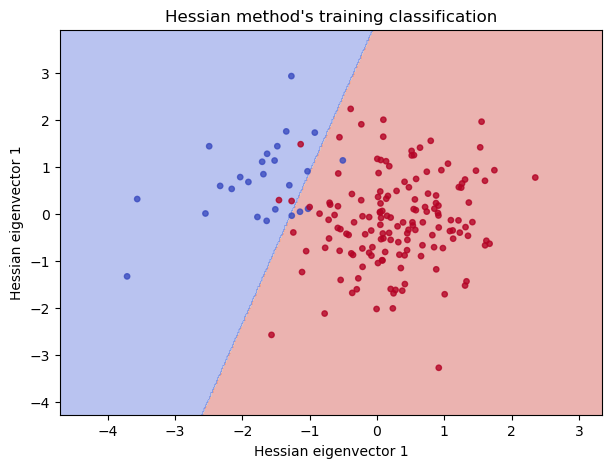

<IPython.core.display.Javascript object>

In [33]:
X_train_proj = pd.DataFrame(X_train_proj)

# Plot the training and test sets along with the separating hyperplane
x_min, x_max = X_train_proj.iloc[:, 0].min() - 1, X_train_proj.iloc[:, 0].max() + 1
y_min, y_max = X_train_proj.iloc[:, 1].min() - 1, X_train_proj.iloc[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.figure(figsize=(7, 5))

plt.contourf(X, Y, Z, alpha=0.4, cmap="coolwarm_r")
plt.scatter(
    X_train_proj.iloc[:, 0],
    X_train_proj.iloc[:, 1],
    c=train_y,
    alpha=0.8,
    cmap="coolwarm_r",
    s=15,
)
plt.xlabel("Hessian eigenvector 1")
plt.ylabel("Hessian eigenvector 1")
plt.title("Hessian method's training classification")
plt.show()

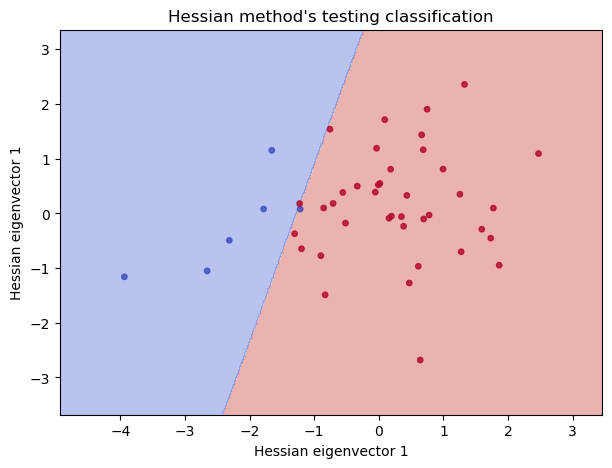

<IPython.core.display.Javascript object>

In [34]:
X_test_proj = pd.DataFrame(X_test_proj)

# Plot the training and test sets along with the separating hyperplane
x_min, x_max = X_test_proj.iloc[:, 0].min() - 1, X_test_proj.iloc[:, 0].max() + 1
y_min, y_max = X_test_proj.iloc[:, 1].min() - 1, X_test_proj.iloc[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.figure(figsize=(7, 5))

plt.contourf(X, Y, Z, alpha=0.4, cmap="coolwarm_r")
plt.scatter(
    X_test_proj.iloc[:, 0],
    X_test_proj.iloc[:, 1],
    c=y_test,
    alpha=0.8,
    cmap="coolwarm_r",
    s=15,
)
plt.xlabel("Hessian eigenvector 1")
plt.ylabel("Hessian eigenvector 1")
plt.title("Hessian method's testing classification")
plt.show()

In [35]:
# Calculate evaluation metrics for test sets

test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)

# Print evaluation metrics for test sets

print("\nTest set metrics:")
print("Confusion Matrix:")
print(confusion_matrix(y_test.values, y_test_pred))
print("Accuracy:", test_acc)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 score:", test_f1)
print("ROC AUC score:", test_roc_auc)
print("Cohen's kappa score:", test_kappa)


Test set metrics:
Confusion Matrix:
[[38  1]
 [ 1  5]]
Accuracy: 0.9555555555555556
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1 score: 0.8333333333333334
ROC AUC score: 0.9038461538461539
Cohen's kappa score: 0.8076923076923077


<IPython.core.display.Javascript object>

## Both cov

In [36]:
# Separate features and target variable
X_train_proj = np.stack((C_train_proj[:,0], C_train_proj[:,1]), axis=1)

X_test_proj = np.stack((C_test_proj[:,0], C_test_proj[:,1]), axis=1)


# Initialize the LinearSVC classifier
classifier = LinearSVC(random_state=1)

# Train the classifier on the training set
classifier.fit(X_train_proj, train_y)

# Make predictions on the training and test sets
y_test_pred = classifier.predict(X_test_proj)


<IPython.core.display.Javascript object>

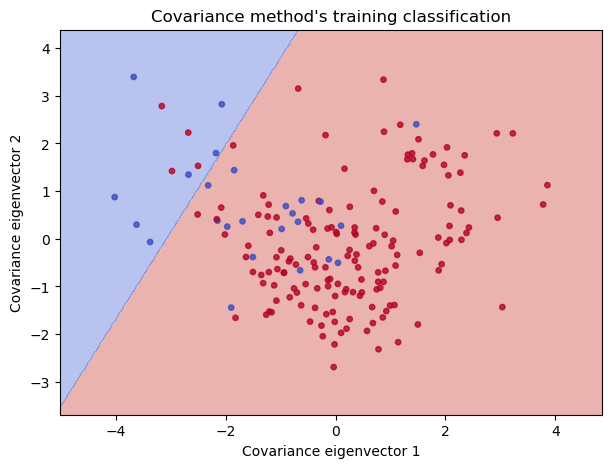

<IPython.core.display.Javascript object>

In [37]:
X_train_proj = pd.DataFrame(X_train_proj)

# Plot the training and test sets along with the separating hyperplane
x_min, x_max = X_train_proj.iloc[:, 0].min() - 1, X_train_proj.iloc[:, 0].max() + 1
y_min, y_max = X_train_proj.iloc[:, 1].min() - 1, X_train_proj.iloc[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.figure(figsize=(7, 5))

plt.contourf(X, Y, Z, alpha=0.4, cmap="coolwarm_r")
plt.scatter(
    X_train_proj.iloc[:, 0],
    X_train_proj.iloc[:, 1],
    c=train_y,
    alpha=0.8,
    cmap="coolwarm_r",
    s=15,
)
plt.xlabel("Covariance eigenvector 1")
plt.ylabel("Covariance eigenvector 2")
plt.title("Covariance method's training classification")
plt.show()

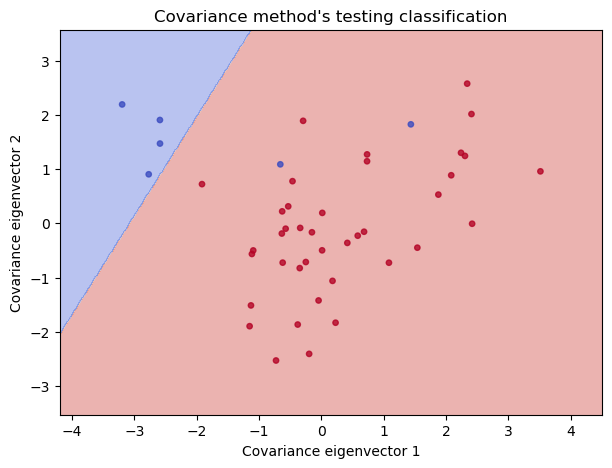

<IPython.core.display.Javascript object>

In [38]:
X_test_proj = pd.DataFrame(X_test_proj, columns=["hess_v1", "cov_v1"])

# Plot the training and test sets along with the separating hyperplane
x_min, x_max = X_test_proj.iloc[:, 0].min() - 1, X_test_proj.iloc[:, 0].max() + 1
y_min, y_max = X_test_proj.iloc[:, 1].min() - 1, X_test_proj.iloc[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.figure(figsize=(7, 5))

plt.contourf(X, Y, Z, alpha=0.4, cmap="coolwarm_r")
plt.scatter(
    X_test_proj.iloc[:, 0],
    X_test_proj.iloc[:, 1],
    c=y_test,
    alpha=0.8,
    cmap="coolwarm_r",
    s=15,
)
plt.xlabel("Covariance eigenvector 1")
plt.ylabel("Covariance eigenvector 2")
plt.title("Covariance method's testing classification")
plt.show()

In [39]:
# Calculate evaluation metrics for test sets

test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)

# Print evaluation metrics for test sets

print("\nTest set metrics:")
print("Confusion Matrix:")
print(confusion_matrix(y_test.values, y_test_pred))
print("Accuracy:", test_acc)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 score:", test_f1)
print("ROC AUC score:", test_roc_auc)
print("Cohen's kappa score:", test_kappa)


Test set metrics:
Confusion Matrix:
[[39  0]
 [ 2  4]]
Accuracy: 0.9555555555555556
Precision: 1.0
Recall: 0.6666666666666666
F1 score: 0.8
ROC AUC score: 0.8333333333333333
Cohen's kappa score: 0.7761194029850746


<IPython.core.display.Javascript object>

## UMAP

In [40]:
# Define the target variable and the features
target = train_y
features = train_X

# Create a supervised UMAP object
umap_supervised = umap.UMAP(
    n_neighbors=20, n_components=2, metric="euclidean", random_state=23
)

# Fit the UMAP model with the features and target variable
embedding = umap_supervised.fit_transform(features, y=target)

<IPython.core.display.Javascript object>

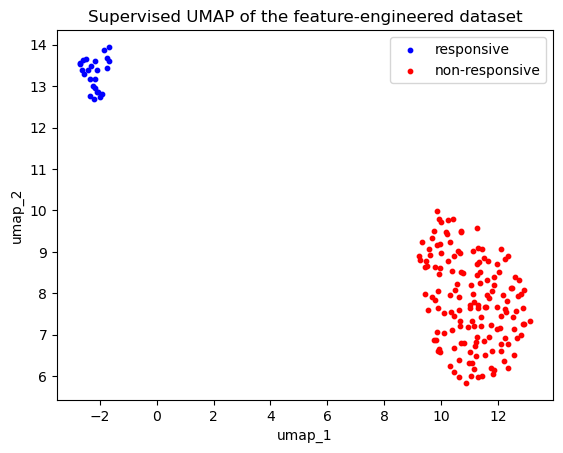

<IPython.core.display.Javascript object>

In [41]:
# Create a scatter plot of the embedding with the target variable as color
responsive = embedding[target == 1]
non_responsive = embedding[target == 0]

plt.scatter(
    responsive[:, 0],
    responsive[:, 1],
    c="blue",
    label="responsive",
    cmap="Spectral",
    s=10,
)
plt.scatter(
    non_responsive[:, 0],
    non_responsive[:, 1],
    c="red",
    label="non-responsive",
    cmap="Spectral",
    s=10,
)

plt.title("Supervised UMAP of the feature-engineered dataset")
plt.xlabel("umap_1")
plt.ylabel("umap_2")
# plt.xlim(-3,13)
# plt.ylim(-2,14)
plt.legend()
plt.show()

In [42]:
# Separate features and target variable
X_train_umap = pd.DataFrame(embedding)
y_train_umap = target

X_test_umap = umap_supervised.transform(X_test)


# Initialize the LinearSVC classifier
classifier = LinearSVC(random_state=1)

# Train the classifier on the training set
classifier.fit(X_train_umap, target)

# Make predictions on the training and test sets
y_test_pred = classifier.predict(X_test_umap)

<IPython.core.display.Javascript object>

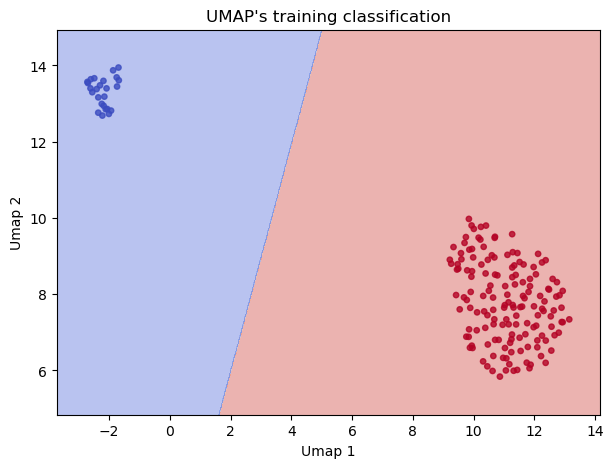

<IPython.core.display.Javascript object>

In [43]:
X_train_proj = X_train_umap

# Plot the training and test sets along with the separating hyperplane
x_min, x_max = X_train_proj.iloc[:, 0].min() - 1, X_train_proj.iloc[:, 0].max() + 1
y_min, y_max = X_train_proj.iloc[:, 1].min() - 1, X_train_proj.iloc[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.figure(figsize=(7, 5))

plt.contourf(X, Y, Z, alpha=0.4, cmap="coolwarm_r")
plt.scatter(
    X_train_proj.iloc[:, 0],
    X_train_proj.iloc[:, 1],
    c=y_train_umap,
    alpha=0.8,
    cmap="coolwarm_r",
    s=15,
)
plt.xlabel("Umap 1")
plt.ylabel("Umap 2")
plt.title("UMAP's training classification")
plt.show()

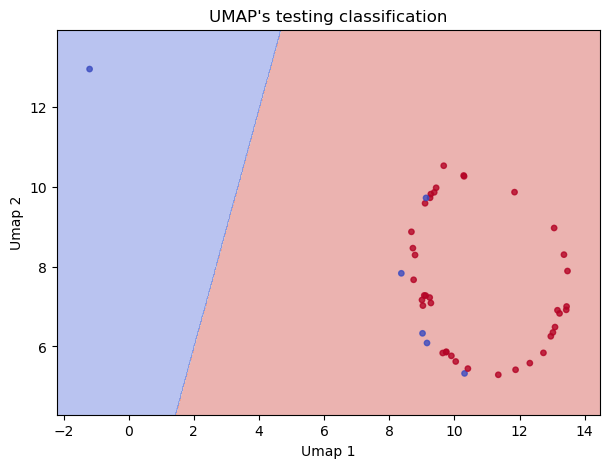

<IPython.core.display.Javascript object>

In [44]:
X_test_proj = pd.DataFrame(X_test_umap)

# Plot the training and test sets along with the separating hyperplane
x_min, x_max = X_test_proj.iloc[:, 0].min() - 1, X_test_proj.iloc[:, 0].max() + 1
y_min, y_max = X_test_proj.iloc[:, 1].min() - 1, X_test_proj.iloc[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = classifier.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.figure(figsize=(7, 5))

plt.contourf(X, Y, Z, alpha=0.4, cmap="coolwarm_r")
plt.scatter(
    X_test_proj.iloc[:, 0],
    X_test_proj.iloc[:, 1],
    c=y_test,
    alpha=0.8,
    cmap="coolwarm_r",
    s=15,
)
plt.xlabel("Umap 1")
plt.ylabel("Umap 2")
plt.title("UMAP's testing classification")
plt.show()

In [45]:
# Calculate evaluation metrics for test sets

test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
test_kappa = cohen_kappa_score(y_test, y_test_pred)

# Print evaluation metrics for test sets
print("\nTest set metrics:")
print("Confusion Matrix:")
print(confusion_matrix(y_test.values, y_test_pred))
print("Accuracy:", test_acc)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 score:", test_f1)
print("ROC AUC score:", test_roc_auc)
print("Cohen's kappa score:", test_kappa)


Test set metrics:
Confusion Matrix:
[[39  0]
 [ 5  1]]
Accuracy: 0.8888888888888888
Precision: 1.0
Recall: 0.16666666666666666
F1 score: 0.2857142857142857
ROC AUC score: 0.5833333333333334
Cohen's kappa score: 0.2574257425742573


<IPython.core.display.Javascript object>

## LDA

In [46]:
# Creating an instance of the LDA class
lda = LinearDiscriminantAnalysis()

# Fitting the LDA model to the data
lda.fit(train_X, train_y)

# Transforming the data to the LDA space
X_lda = lda.transform(train_X)

<IPython.core.display.Javascript object>

In [47]:
X_lda

array([[ 2.80904807e+00],
       [-1.70232642e-01],
       [-9.03245562e-01],
       [ 2.32255005e+00],
       [ 8.46264258e-01],
       [ 9.79528252e-01],
       [ 2.85482003e+00],
       [-3.36120951e+00],
       [-1.60731737e+00],
       [-8.12061387e-01],
       [-3.36902161e+00],
       [-2.65198816e+00],
       [-1.67597335e+00],
       [-3.65086867e-01],
       [ 3.37527330e-01],
       [ 1.75390442e+00],
       [-8.57088865e-01],
       [-3.20369196e-01],
       [-2.29046265e-01],
       [ 1.54682064e+00],
       [ 2.97422076e-01],
       [-1.89981415e+00],
       [ 1.45316579e+00],
       [ 5.07172437e-02],
       [ 5.49564498e-02],
       [ 8.02320123e-01],
       [ 3.72167051e-01],
       [-4.46772299e+00],
       [ 1.72211270e+00],
       [-3.86167612e+00],
       [ 1.13978024e+00],
       [-4.64514403e-01],
       [-3.46220372e+00],
       [ 4.42587268e-01],
       [-8.29586085e-01],
       [ 1.73534903e-01],
       [ 8.62538929e-01],
       [ 5.63192445e-01],
       [ 1.1

<IPython.core.display.Javascript object>

In [48]:
# Fit the SVM model to the training data
svm = SVC(kernel="linear")
svm.fit(X_lda, train_y)

# Extract hyperplane coefficients
w = svm.coef_[0]
b = svm.intercept_[0]

# Make predictions on the test data
X_lda_test = lda.transform(X_test)
y_pred = svm.predict(X_lda_test)

<IPython.core.display.Javascript object>

[-1.86307505]


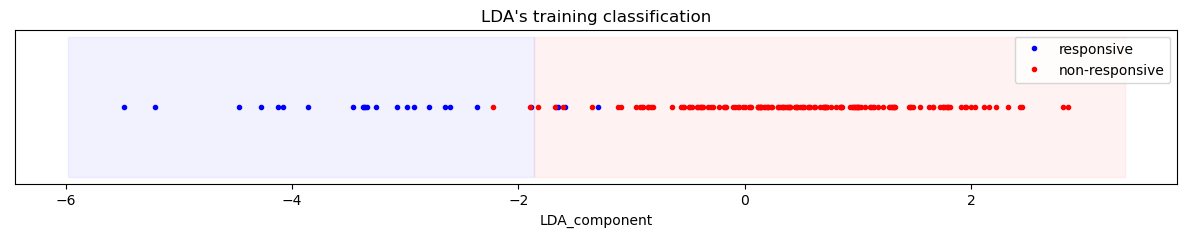

<IPython.core.display.Javascript object>

In [49]:
# Create a plot of the embedding with the target variable as color
responsive = X_lda[train_y == 1]
non_responsive = X_lda[train_y == 0]

# Find the midpoint between the rightmost blue point and the leftmost red point
midpoint = -b / w
print(midpoint)

plt.figure(figsize=(15, 2))

plt.plot(
    responsive[:, 0],
    np.zeros_like(responsive[:, 0]),
    "bo",
    label="responsive",
    markersize=3,
)
plt.plot(
    non_responsive[:, 0],
    np.zeros_like(non_responsive[:, 0]),
    "ro",
    label="non-responsive",
    markersize=3,
)
# plt.plot(midpoint, 0, 'g*', label='0-D hyperplane', markersize=12)


# Shade the areas on either side of the midpoint
plt.fill_betweenx(
    [-5, 5], midpoint, np.min(responsive[:, 0]) - 0.5, color="blue", alpha=0.05
)
plt.fill_betweenx(
    [-5, 5], np.max(non_responsive[:, 0]) + 0.5, midpoint, color="red", alpha=0.05
)

# Add a vertical line at the midpoint
# plt.axvline(midpoint, color='k', linestyle='--')

plt.title(f"LDA's training classification")
plt.xlabel("LDA_component")
plt.legend()
plt.gca().get_yaxis().set_visible(False)
plt.show()

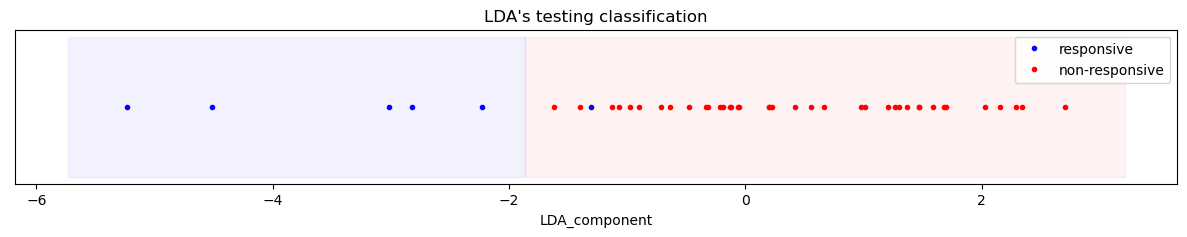

<IPython.core.display.Javascript object>

In [50]:
# Create a plot of the embedding with the target variable as color
responsive = X_lda_test[y_test == 1]
non_responsive = X_lda_test[y_test == 0]

# Find the midpoint between the rightmost blue point and the leftmost red point
midpoint = -b / w

plt.figure(figsize=(15, 2))

plt.plot(
    responsive[:, 0],
    np.zeros_like(responsive[:, 0]),
    "bo",
    label="responsive",
    markersize=3,
)
plt.plot(
    non_responsive[:, 0],
    np.zeros_like(non_responsive[:, 0]),
    "ro",
    label="non-responsive",
    markersize=3,
)
# plt.plot(midpoint, 0, 'g*', label='0-D hyperplane', markersize=12)


# Shade the areas on either side of the midpoint
plt.fill_betweenx(
    [-5, 5], midpoint, np.min(responsive[:, 0]) - 0.5, color="blue", alpha=0.05
)
plt.fill_betweenx(
    [-5, 5], np.max(non_responsive[:, 0]) + 0.5, midpoint, color="red", alpha=0.05
)

# Add a vertical line at the midpoint
# plt.axvline(midpoint, color='k', linestyle='--')

plt.title(f"LDA's testing classification")
plt.xlabel("LDA_component")
plt.legend()
plt.gca().get_yaxis().set_visible(False)
plt.show()

In [51]:
# Calculate evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# Print the evaluation metrics
print(y_test.values)
print(y_pred)
print("Test set metrics:")
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("ROC AUC score:", roc_auc)
print("Cohen's kappa score:", cohen_kappa)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Test set metrics:
Confusion Matrix:
 [[39  0]
 [ 1  5]]
Accuracy: 0.9777777777777777
Precision: 1.0
Recall: 0.8333333333333334
F1 score: 0.9090909090909091
ROC AUC score: 0.9166666666666667
Cohen's kappa score: 0.896551724137931


<IPython.core.display.Javascript object>

## Cross-validation

In [52]:
# Define the number of folds
k = 5

# Create KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

X_df = dataset_df.drop("class", axis=1)
y_df = dataset_df["class"]

# Reset the index of the DataFrame
X_df = X_df.reset_index(drop=True)
y_df = y_df.reset_index(drop=True)

# Initialize lists to store performance metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
kappa_scores = []


# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X_df)):
    # Split the data into train and test sets
    train_X, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    train_y, y_test = y_df.iloc[train_index], y_df.iloc[test_index]

    # Calculating the covariance matrix
    covariance_matrix = train_X.cov()
    C_eigenvalues, C_eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_indices = np.argsort(C_eigenvalues)[::-1]
    C_eigenvalues_sorted = C_eigenvalues[sorted_indices]
    C_eigenvectors_sorted = C_eigenvectors[:, sorted_indices]

    # Set the random seed
    torch.manual_seed(19)

    # Create data loaders for training and test sets
    train_dataset = MyDataset(X_train, y_train)
    test_dataset = MyDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Instantiate the model and the optimizer
    model = MyModel(X_train.shape[1])
    optimizer = optim.Adam(model.parameters())

    # Train the model
    num_epochs = 1000
    es = None  # early stopping is not needed in this example
    criterion = nn.BCELoss()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()

    # Set the model to evaluation mode
    model.eval()

    # Compute the average Hessian matrix
    hessian_sum = None
    for i in range(len(train_X)):
        x = torch.tensor(train_X.iloc[i].values, dtype=torch.float32)
        y = torch.tensor([train_y.iloc[i]], dtype=torch.float32)

        hessian_matrix = hessian(lambda inputs: criterion(model(inputs), y), x)

        if hessian_sum is None:
            hessian_sum = hessian_matrix
        else:
            hessian_sum += hessian_matrix

    hessian_matrix_avg = hessian_sum / len(train_X)

    H = hessian_matrix_avg.numpy()
    H_eigenvalues, H_eigenvectors = np.linalg.eig(H)

    # Compute 15-dimensional projections using eigenvectors_sorted
    H_train_proj = np.dot(train_X, H_eigenvectors_sorted[:, :15])

    # Compute 15-dimensional projections using eigenvectors_sorted
    C_train_proj = np.dot(train_X, C_eigenvectors_sorted[:, :15])

    # Compute 15-dimensional projections using eigenvectors_sorted
    H_test_proj = np.dot(X_test, H_eigenvectors_sorted[:, :15])

    # Compute 15-dimensional projections using eigenvectors_sorted
    C_test_proj = np.dot(X_test, C_eigenvectors_sorted[:, :15])

    # Separate features and target variable
    X_train_proj = np.stack((H_train_proj[:, 0], C_train_proj[:, 0]), axis=1)

    X_test_proj = np.stack((H_test_proj[:, 0], C_test_proj[:, 0]), axis=1)

    # Initialize the LinearSVC classifier
    classifier = LinearSVC(random_state=1)

    # Train the classifier on the training set
    classifier.fit(X_train_proj, train_y)

    # Make predictions on the training and test sets
    y_test_pred = classifier.predict(X_test_proj)

    test_acc = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    test_kappa = cohen_kappa_score(y_test, y_test_pred)

    # Print the performance metrics for the current fold
    print(
        f"Fold {fold + 1}: Accuracy={test_acc}, Precision={test_precision}, Recall={test_recall}, F1={test_f1}, ROC AUC={test_roc_auc}, Cohen's Kappa={test_kappa}"
    )

    # Append the performance metrics to the respective lists
    accuracy_scores.append(test_acc)
    precision_scores.append(test_precision)
    recall_scores.append(test_recall)
    f1_scores.append(test_f1)
    roc_auc_scores.append(test_roc_auc)
    kappa_scores.append(test_kappa)

# Calculate and print the average performance across all folds
print("Average Performance:")
proposed_values = [
    np.mean(precision_scores),
    np.mean(recall_scores),
    np.mean(f1_scores),
    np.mean(roc_auc_scores),
    np.mean(kappa_scores),
]
print(
    f"Accuracy={np.mean(accuracy_scores)}, Precision={np.mean(precision_scores)}, Recall={np.mean(recall_scores)}, F1={np.mean(f1_scores)}, ROC AUC={np.mean(roc_auc_scores)}, Cohen's Kappa={np.mean(kappa_scores)}"
)

Fold 1: Accuracy=1.0, Precision=1.0, Recall=1.0, F1=1.0, ROC AUC=1.0, Cohen's Kappa=1.0
Fold 2: Accuracy=0.9545454545454546, Precision=0.8571428571428571, Recall=0.8571428571428571, F1=0.8571428571428571, ROC AUC=0.9150579150579151, Cohen's Kappa=0.8301158301158301
Fold 3: Accuracy=0.9545454545454546, Precision=0.8571428571428571, Recall=0.8571428571428571, F1=0.8571428571428571, ROC AUC=0.9150579150579151, Cohen's Kappa=0.8301158301158301
Fold 4: Accuracy=0.9772727272727273, Precision=1.0, Recall=0.8, F1=0.888888888888889, ROC AUC=0.9, Cohen's Kappa=0.8764044943820225
Fold 5: Accuracy=0.9772727272727273, Precision=1.0, Recall=0.8333333333333334, F1=0.9090909090909091, ROC AUC=0.9166666666666667, Cohen's Kappa=0.8962264150943396
Average Performance:
Accuracy=0.9727272727272729, Precision=0.9428571428571428, Recall=0.8695238095238095, F1=0.9024531024531024, ROC AUC=0.9293564993564993, Cohen's Kappa=0.8865725139416044


<IPython.core.display.Javascript object>

In [53]:
# Define the number of folds
k = 5

# Create KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

X_df = dataset_df.drop("class", axis=1)
y_df = dataset_df["class"]

# Reset the index of the DataFrame
X_df = X_df.reset_index(drop=True)
y_df = y_df.reset_index(drop=True)

# Initialize lists to store performance metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
kappa_scores = []


# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X_df)):
    # Split the data into train and test sets
    train_X, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    train_y, y_test = y_df.iloc[train_index], y_df.iloc[test_index]

    # Calculating the covariance matrix
    covariance_matrix = train_X.cov()
    C_eigenvalues, C_eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_indices = np.argsort(C_eigenvalues)[::-1]
    C_eigenvalues_sorted = C_eigenvalues[sorted_indices]
    C_eigenvectors_sorted = C_eigenvectors[:, sorted_indices]

    # Set the random seed
    torch.manual_seed(19)

    # Create data loaders for training and test sets
    train_dataset = MyDataset(X_train, y_train)
    test_dataset = MyDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Instantiate the model and the optimizer
    model = MyModel(X_train.shape[1])
    optimizer = optim.Adam(model.parameters())

    # Train the model
    num_epochs = 1000
    es = None  # early stopping is not needed in this example
    criterion = nn.BCELoss()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()

    # Set the model to evaluation mode
    model.eval()

    # Compute the average Hessian matrix
    hessian_sum = None
    for i in range(len(train_X)):
        x = torch.tensor(train_X.iloc[i].values, dtype=torch.float32)
        y = torch.tensor([train_y.iloc[i]], dtype=torch.float32)

        hessian_matrix = hessian(lambda inputs: criterion(model(inputs), y), x)

        if hessian_sum is None:
            hessian_sum = hessian_matrix
        else:
            hessian_sum += hessian_matrix

    hessian_matrix_avg = hessian_sum / len(train_X)

    H = hessian_matrix_avg.numpy()
    H_eigenvalues, H_eigenvectors = np.linalg.eig(H)

    # Compute 15-dimensional projections using eigenvectors_sorted
    H_train_proj = np.dot(train_X, H_eigenvectors_sorted[:, :15])

    # Compute 15-dimensional projections using eigenvectors_sorted
    C_train_proj = np.dot(train_X, C_eigenvectors_sorted[:, :15])

    # Compute 15-dimensional projections using eigenvectors_sorted
    H_test_proj = np.dot(X_test, H_eigenvectors_sorted[:, :15])

    # Compute 15-dimensional projections using eigenvectors_sorted
    C_test_proj = np.dot(X_test, C_eigenvectors_sorted[:, :15])

    # Separate features and target variable
    X_train_proj = np.stack((H_train_proj[:, 0], H_train_proj[:, 1]), axis=1)

    X_test_proj = np.stack((H_test_proj[:, 0], H_test_proj[:, 1]), axis=1)

    # Initialize the LinearSVC classifier
    classifier = LinearSVC(random_state=1)

    # Train the classifier on the training set
    classifier.fit(X_train_proj, train_y)

    # Make predictions on the training and test sets
    y_test_pred = classifier.predict(X_test_proj)

    test_acc = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    test_kappa = cohen_kappa_score(y_test, y_test_pred)

    # Print the performance metrics for the current fold
    print(
        f"Fold {fold + 1}: Accuracy={test_acc}, Precision={test_precision}, Recall={test_recall}, F1={test_f1}, ROC AUC={test_roc_auc}, Cohen's Kappa={test_kappa}"
    )

    # Append the performance metrics to the respective lists
    accuracy_scores.append(test_acc)
    precision_scores.append(test_precision)
    recall_scores.append(test_recall)
    f1_scores.append(test_f1)
    roc_auc_scores.append(test_roc_auc)
    kappa_scores.append(test_kappa)

# Calculate and print the average performance across all folds
print("Average Performance:")
hessian_values = [
    np.mean(precision_scores),
    np.mean(recall_scores),
    np.mean(f1_scores),
    np.mean(roc_auc_scores),
    np.mean(kappa_scores),
]
print(
    f"Accuracy={np.mean(accuracy_scores)}, Precision={np.mean(precision_scores)}, Recall={np.mean(recall_scores)}, F1={np.mean(f1_scores)}, ROC AUC={np.mean(roc_auc_scores)}, Cohen's Kappa={np.mean(kappa_scores)}"
)

Fold 1: Accuracy=0.9555555555555556, Precision=0.8333333333333334, Recall=0.8333333333333334, F1=0.8333333333333334, ROC AUC=0.9038461538461539, Cohen's Kappa=0.8076923076923077
Fold 2: Accuracy=0.9545454545454546, Precision=0.8571428571428571, Recall=0.8571428571428571, F1=0.8571428571428571, ROC AUC=0.9150579150579151, Cohen's Kappa=0.8301158301158301
Fold 3: Accuracy=0.9545454545454546, Precision=1.0, Recall=0.7142857142857143, F1=0.8333333333333333, ROC AUC=0.8571428571428572, Cohen's Kappa=0.8078602620087336
Fold 4: Accuracy=0.9545454545454546, Precision=0.8, Recall=0.8, F1=0.8000000000000002, ROC AUC=0.8871794871794871, Cohen's Kappa=0.7743589743589744
Fold 5: Accuracy=0.9545454545454546, Precision=0.8333333333333334, Recall=0.8333333333333334, F1=0.8333333333333334, ROC AUC=0.9035087719298246, Cohen's Kappa=0.8070175438596491
Average Performance:
Accuracy=0.9547474747474748, Precision=0.8647619047619047, Recall=0.8076190476190476, F1=0.8314285714285715, ROC AUC=0.893347037031247

<IPython.core.display.Javascript object>

In [54]:
# Define the number of folds
k = 5

# Create KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

X_df = dataset_df.drop("class", axis=1)
y_df = dataset_df["class"]

# Reset the index of the DataFrame
X_df = X_df.reset_index(drop=True)
y_df = y_df.reset_index(drop=True)

# Initialize lists to store performance metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
kappa_scores = []


# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X_df)):
    # Split the data into train and test sets
    train_X, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    train_y, y_test = y_df.iloc[train_index], y_df.iloc[test_index]

    # Calculating the covariance matrix
    covariance_matrix = train_X.cov()
    C_eigenvalues, C_eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_indices = np.argsort(C_eigenvalues)[::-1]
    C_eigenvalues_sorted = C_eigenvalues[sorted_indices]
    C_eigenvectors_sorted = C_eigenvectors[:, sorted_indices]

    # Set the random seed
    torch.manual_seed(19)

    # Create data loaders for training and test sets
    train_dataset = MyDataset(X_train, y_train)
    test_dataset = MyDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Instantiate the model and the optimizer
    model = MyModel(X_train.shape[1])
    optimizer = optim.Adam(model.parameters())

    # Train the model
    num_epochs = 1000
    es = None  # early stopping is not needed in this example
    criterion = nn.BCELoss()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()

    # Set the model to evaluation mode
    model.eval()

    # Compute the average Hessian matrix
    hessian_sum = None
    for i in range(len(train_X)):
        x = torch.tensor(train_X.iloc[i].values, dtype=torch.float32)
        y = torch.tensor([train_y.iloc[i]], dtype=torch.float32)

        hessian_matrix = hessian(lambda inputs: criterion(model(inputs), y), x)

        if hessian_sum is None:
            hessian_sum = hessian_matrix
        else:
            hessian_sum += hessian_matrix

    hessian_matrix_avg = hessian_sum / len(train_X)

    H = hessian_matrix_avg.numpy()
    H_eigenvalues, H_eigenvectors = np.linalg.eig(H)

    # Compute 15-dimensional projections using eigenvectors_sorted
    H_train_proj = np.dot(train_X, H_eigenvectors_sorted[:, :15])

    # Compute 15-dimensional projections using eigenvectors_sorted
    C_train_proj = np.dot(train_X, C_eigenvectors_sorted[:, :15])

    # Compute 15-dimensional projections using eigenvectors_sorted
    H_test_proj = np.dot(X_test, H_eigenvectors_sorted[:, :15])

    # Compute 15-dimensional projections using eigenvectors_sorted
    C_test_proj = np.dot(X_test, C_eigenvectors_sorted[:, :15])

    # Separate features and target variable
    X_train_proj = np.stack((C_train_proj[:, 0], C_train_proj[:, 1]), axis=1)

    X_test_proj = np.stack((C_test_proj[:, 0], C_test_proj[:, 1]), axis=1)

    # Initialize the LinearSVC classifier
    classifier = LinearSVC(random_state=1)

    # Train the classifier on the training set
    classifier.fit(X_train_proj, train_y)

    # Make predictions on the training and test sets
    y_test_pred = classifier.predict(X_test_proj)

    test_acc = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    test_kappa = cohen_kappa_score(y_test, y_test_pred)

    # Print the performance metrics for the current fold
    print(
        f"Fold {fold + 1}: Accuracy={test_acc}, Precision={test_precision}, Recall={test_recall}, F1={test_f1}, ROC AUC={test_roc_auc}, Cohen's Kappa={test_kappa}"
    )

    # Append the performance metrics to the respective lists
    accuracy_scores.append(test_acc)
    precision_scores.append(test_precision)
    recall_scores.append(test_recall)
    f1_scores.append(test_f1)
    roc_auc_scores.append(test_roc_auc)
    kappa_scores.append(test_kappa)

# Calculate and print the average performance across all folds
print("Average Performance:")
cov_values = [
    np.mean(precision_scores),
    np.mean(recall_scores),
    np.mean(f1_scores),
    np.mean(roc_auc_scores),
    np.mean(kappa_scores),
]
print(
    f"Accuracy={np.mean(accuracy_scores)}, Precision={np.mean(precision_scores)}, Recall={np.mean(recall_scores)}, F1={np.mean(f1_scores)}, ROC AUC={np.mean(roc_auc_scores)}, Cohen's Kappa={np.mean(kappa_scores)}"
)

Fold 1: Accuracy=0.9555555555555556, Precision=1.0, Recall=0.6666666666666666, F1=0.8, ROC AUC=0.8333333333333333, Cohen's Kappa=0.7761194029850746
Fold 2: Accuracy=0.8863636363636364, Precision=1.0, Recall=0.2857142857142857, F1=0.4444444444444445, ROC AUC=0.6428571428571428, Cohen's Kappa=0.40217391304347827
Fold 3: Accuracy=0.8863636363636364, Precision=0.75, Recall=0.42857142857142855, F1=0.5454545454545454, ROC AUC=0.7007722007722008, Cohen's Kappa=0.4859813084112149
Fold 4: Accuracy=0.9545454545454546, Precision=1.0, Recall=0.6, F1=0.7499999999999999, ROC AUC=0.8, Cohen's Kappa=0.7267080745341614
Fold 5: Accuracy=0.7954545454545454, Precision=0.2, Recall=0.16666666666666666, F1=0.1818181818181818, ROC AUC=0.530701754385965, Cohen's Kappa=0.06603773584905659
Average Performance:
Accuracy=0.8956565656565656, Precision=0.79, Recall=0.42952380952380953, F1=0.5443434343434344, ROC AUC=0.7015328862697283, Cohen's Kappa=0.49140408696459714


<IPython.core.display.Javascript object>

In [55]:
# Define the number of folds
k = 5

# Create KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

X_df = dataset_df.drop("class", axis=1)
y_df = dataset_df["class"]

# Reset the index of the DataFrame
X_df = X_df.reset_index(drop=True)
y_df = y_df.reset_index(drop=True)

# Initialize lists to store performance metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
kappa_scores = []

# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X_df)):
    # Split the data into train and test sets
    train_X, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    train_y, y_test = y_df.iloc[train_index], y_df.iloc[test_index]

    # Creating an instance of the LDA class
    lda = LinearDiscriminantAnalysis()

    # Fitting the LDA model to the data
    lda.fit(train_X, train_y)

    # Transforming the data to the LDA space
    X_lda = lda.transform(train_X)

    # Fit the SVM model to the training data
    svm = SVC(kernel="linear")
    svm.fit(X_lda, train_y)

    # Make predictions on the test data
    X_lda_test = lda.transform(X_test)
    y_test_pred = svm.predict(X_lda_test)

    test_acc = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    test_kappa = cohen_kappa_score(y_test, y_test_pred)

    # Print the performance metrics for the current fold
    print(
        f"Fold {fold + 1}: Accuracy={test_acc}, Precision={test_precision}, Recall={test_recall}, F1={test_f1}, ROC AUC={test_roc_auc}, Cohen's Kappa={test_kappa}"
    )

    # Append the performance metrics to the respective lists
    accuracy_scores.append(test_acc)
    precision_scores.append(test_precision)
    recall_scores.append(test_recall)
    f1_scores.append(test_f1)
    roc_auc_scores.append(test_roc_auc)
    kappa_scores.append(test_kappa)

# Calculate and print the average performance across all folds
print("Average Performance:")
lda_values = [np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores), np.mean(roc_auc_scores), np.mean(kappa_scores)]
print(
    f"Accuracy={np.mean(accuracy_scores)}, Precision={np.mean(precision_scores)}, Recall={np.mean(recall_scores)}, F1={np.mean(f1_scores)}, ROC AUC={np.mean(roc_auc_scores)}, Cohen's Kappa={np.mean(kappa_scores)}"
)


Fold 1: Accuracy=0.9777777777777777, Precision=1.0, Recall=0.8333333333333334, F1=0.9090909090909091, ROC AUC=0.9166666666666667, Cohen's Kappa=0.896551724137931
Fold 2: Accuracy=0.9545454545454546, Precision=0.8571428571428571, Recall=0.8571428571428571, F1=0.8571428571428571, ROC AUC=0.9150579150579151, Cohen's Kappa=0.8301158301158301
Fold 3: Accuracy=0.9772727272727273, Precision=1.0, Recall=0.8571428571428571, F1=0.923076923076923, ROC AUC=0.9285714285714286, Cohen's Kappa=0.9098360655737705
Fold 4: Accuracy=0.9545454545454546, Precision=0.8, Recall=0.8, F1=0.8000000000000002, ROC AUC=0.8871794871794871, Cohen's Kappa=0.7743589743589744
Fold 5: Accuracy=0.8863636363636364, Precision=0.6, Recall=0.5, F1=0.5454545454545454, ROC AUC=0.7236842105263158, Cohen's Kappa=0.4811320754716981
Average Performance:
Accuracy=0.9501010101010101, Precision=0.8514285714285714, Recall=0.7695238095238095, F1=0.806953046953047, ROC AUC=0.8742319416003627, Cohen's Kappa=0.7783989339316408


<IPython.core.display.Javascript object>

In [56]:
# Define the number of folds
k = 5

# Create KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

X_df = dataset_df.drop("class", axis=1)
y_df = dataset_df["class"]

# Reset the index of the DataFrame
X_df = X_df.reset_index(drop=True)
y_df = y_df.reset_index(drop=True)

# Initialize lists to store performance metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
kappa_scores = []


# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X_df)):
    # Split the data into train and test sets
    train_X, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    train_y, y_test = y_df.iloc[train_index], y_df.iloc[test_index]

    # Define the target variable and the features
    target = train_y
    features = train_X

    # Create a supervised UMAP object
    umap_supervised = umap.UMAP(
        n_neighbors=20, n_components=2, metric="euclidean", random_state=23
    )

    # Fit the UMAP model with the features and target variable
    embedding = umap_supervised.fit_transform(features, y=target)

    # Separate features and target variable
    X_train_umap = pd.DataFrame(embedding)
    y_train_umap = target

    X_test_umap = umap_supervised.transform(X_test)

    # Initialize the LinearSVC classifier
    classifier = LinearSVC(random_state=1)

    # Train the classifier on the training set
    classifier.fit(X_train_umap, target)

    # Make predictions on the training and test sets
    y_test_pred = classifier.predict(X_test_umap)

    test_acc = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    test_kappa = cohen_kappa_score(y_test, y_test_pred)

    # Print the performance metrics for the current fold
    print(
        f"Fold {fold + 1}: Accuracy={test_acc}, Precision={test_precision}, Recall={test_recall}, F1={test_f1}, ROC AUC={test_roc_auc}, Cohen's Kappa={test_kappa}"
    )

    # Append the performance metrics to the respective lists
    accuracy_scores.append(test_acc)
    precision_scores.append(test_precision)
    recall_scores.append(test_recall)
    f1_scores.append(test_f1)
    roc_auc_scores.append(test_roc_auc)
    kappa_scores.append(test_kappa)

# Calculate and print the average performance across all folds
print("Average Performance:")
umap_values = [
    np.mean(precision_scores),
    np.mean(recall_scores),
    np.mean(f1_scores),
    np.mean(roc_auc_scores),
    np.mean(kappa_scores),
]
print(
    f"Accuracy={np.mean(accuracy_scores)}, Precision={np.mean(precision_scores)}, Recall={np.mean(recall_scores)}, F1={np.mean(f1_scores)}, ROC AUC={np.mean(roc_auc_scores)}, Cohen's Kappa={np.mean(kappa_scores)}"
)

Fold 1: Accuracy=0.9333333333333333, Precision=0.8, Recall=0.6666666666666666, F1=0.7272727272727272, ROC AUC=0.8205128205128204, Cohen's Kappa=0.6896551724137931
Fold 2: Accuracy=0.8409090909090909, Precision=0.0, Recall=0.0, F1=0.0, ROC AUC=0.5, Cohen's Kappa=0.0
Fold 3: Accuracy=0.8636363636363636, Precision=1.0, Recall=0.14285714285714285, F1=0.25, ROC AUC=0.5714285714285714, Cohen's Kappa=0.21893491124260356
Fold 4: Accuracy=0.8863636363636364, Precision=0.0, Recall=0.0, F1=0.0, ROC AUC=0.5, Cohen's Kappa=0.0
Fold 5: Accuracy=0.8636363636363636, Precision=0.0, Recall=0.0, F1=0.0, ROC AUC=0.5, Cohen's Kappa=0.0
Average Performance:
Accuracy=0.8775757575757576, Precision=0.36, Recall=0.1619047619047619, F1=0.19545454545454544, ROC AUC=0.5783882783882783, Cohen's Kappa=0.18171801673127935


<IPython.core.display.Javascript object>

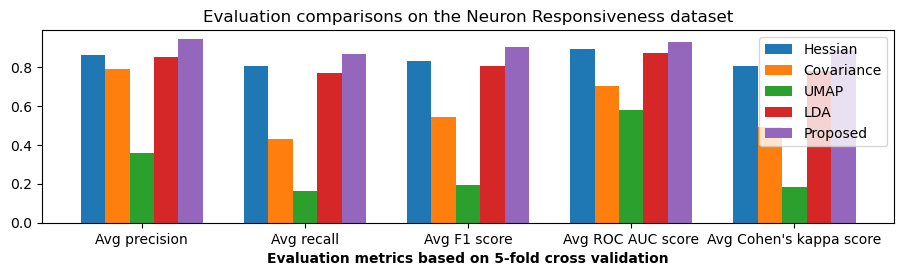

<IPython.core.display.Javascript object>

In [57]:
# Define the evaluation metrics and their values for each method
methods = ["UMAP", "LDA", "Proposed"]
metrics = [
    "Avg precision",
    "Avg recall",
    "Avg F1 score",
    "Avg ROC AUC score",
    "Avg Cohen's kappa score",
]


# Set the positions and width of the bars
pos = np.arange(len(metrics))
width = 0.15

# Plot the bars for each method and evaluation metric
fig, ax = plt.subplots(figsize=(11, 2.5))
plt.bar(pos - 2 * width, hessian_values, width, label="Hessian")
plt.bar(pos - width, cov_values, width, label="Covariance")
plt.bar(pos, umap_values, width, label="UMAP")
plt.bar(pos + width, lda_values, width, label="LDA")
plt.bar(pos + 2 * width, proposed_values, width, label="Proposed")

# Add xticks on the middle of the group bars
plt.xlabel("Evaluation metrics based on 5-fold cross validation", fontweight="bold")
# plt.ylabel("Values", fontweight="bold")
plt.xticks(pos, metrics)
plt.title("Evaluation comparisons on the Neuron Responsiveness dataset")
plt.legend()

plt.show()